# MODELO DE CLASISFICACIÓN DIAGNOSITICO DEL TIPO DE ANEMIA DEL PACIENTE

## 1. Extraer data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt 
import statistics as st
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('data/diagnosed_cbc_data_v4.csv')
data.head(10)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia
5,6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207.0,11.5,0.18,Other microcytic anemia
6,16.7,19.1,68.2,3.2,11.4,5.15,14.2,44.8,87.1,27.5,31.6,151.0,12.8,0.14,Leukemia
7,9.3,27.4,64.0,2.6,5.9,4.39,12.0,37.9,86.4,27.3,31.6,194.0,15.9,0.19,Normocytic hypochromic anemia
8,5.2,19.7,72.4,1.0,3.8,4.85,13.2,41.0,84.7,27.2,32.1,181.0,10.0,0.15,Healthy
9,10.5,12.4,79.0,1.3,8.3,4.57,12.4,38.9,85.3,27.1,31.8,164.0,11.3,0.14,Normocytic hypochromic anemia


## 2. EDA

In [3]:
def q01(x): return x.quantile(0.01)
def q50(x): return x.quantile(0.50)
def q99(x): return x.quantile(0.99)

In [4]:
data.shape

(1281, 15)

In [5]:
data.info() #No hay valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WBC,1281.0,7.862717,3.564466,0.80,6.00000,7.400000,8.68000,45.7
LYMp,1281.0,25.845000,7.038728,6.20,25.84500,25.845000,25.84500,91.4
NEUTp,1281.0,77.511000,147.746273,0.70,71.10000,77.511000,77.51100,5317.0
LYMn,1281.0,1.880760,1.335689,0.20,1.88076,1.880760,1.88076,41.8
NEUTn,1281.0,5.140940,2.872294,0.50,5.10000,5.140940,5.14094,79.0
RBC,1281.0,4.708267,2.817200,1.36,4.19000,4.600000,5.10000,90.8
HGB,1281.0,12.184551,3.812897,-10.00,10.80000,12.300000,13.50000,87.1
HCT,1281.0,46.152600,104.886100,2.00,39.20000,46.152600,46.15260,3715.0
MCV,1281.0,85.793919,27.177663,-79.30,81.20000,86.600000,90.20000,990.0
MCH,1281.0,32.084840,111.170756,10.90,25.50000,27.800000,29.60000,3117.0


In [7]:
data.describe(include=[object]).T 

,count,unique,top,freq
Diagnosis,1281,9,Healthy,336


In [8]:
data.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [9]:
print(f'Antes de filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Despues de filas repetidas: {data.shape}')

Antes de filas repetidas: (1281, 15)
Despues de filas repetidas: (1232, 15)


In [10]:
data.columns

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT', 'Diagnosis'],
      dtype='object')

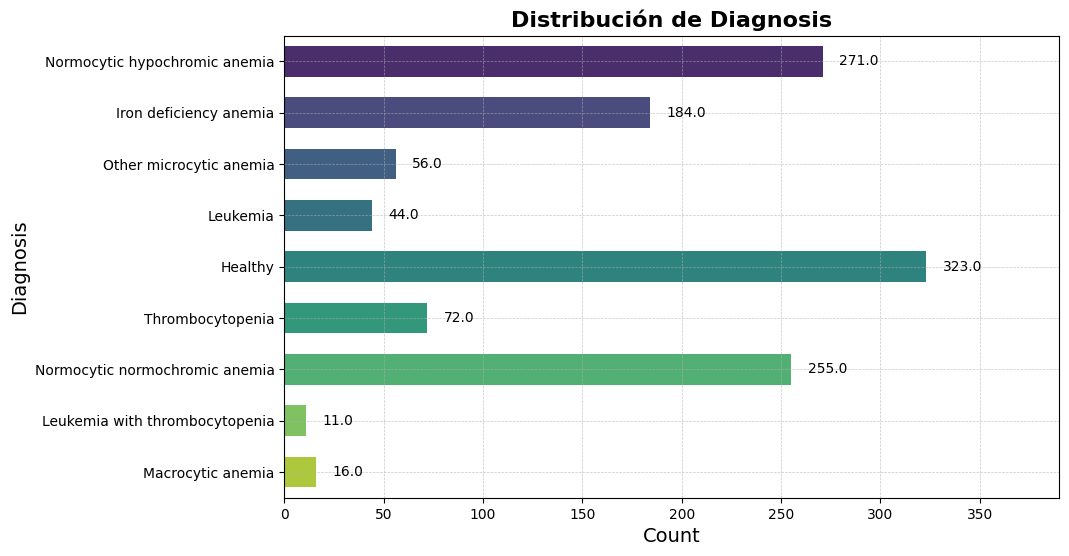

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y='Diagnosis', palette='viridis', width=0.6)

ax.set_title('Distribución de Diagnosis', fontsize=16, fontweight='bold')
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Diagnosis', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(0, 390)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=10, color='black', xytext=(12, 0),
                textcoords='offset points')

plt.show()

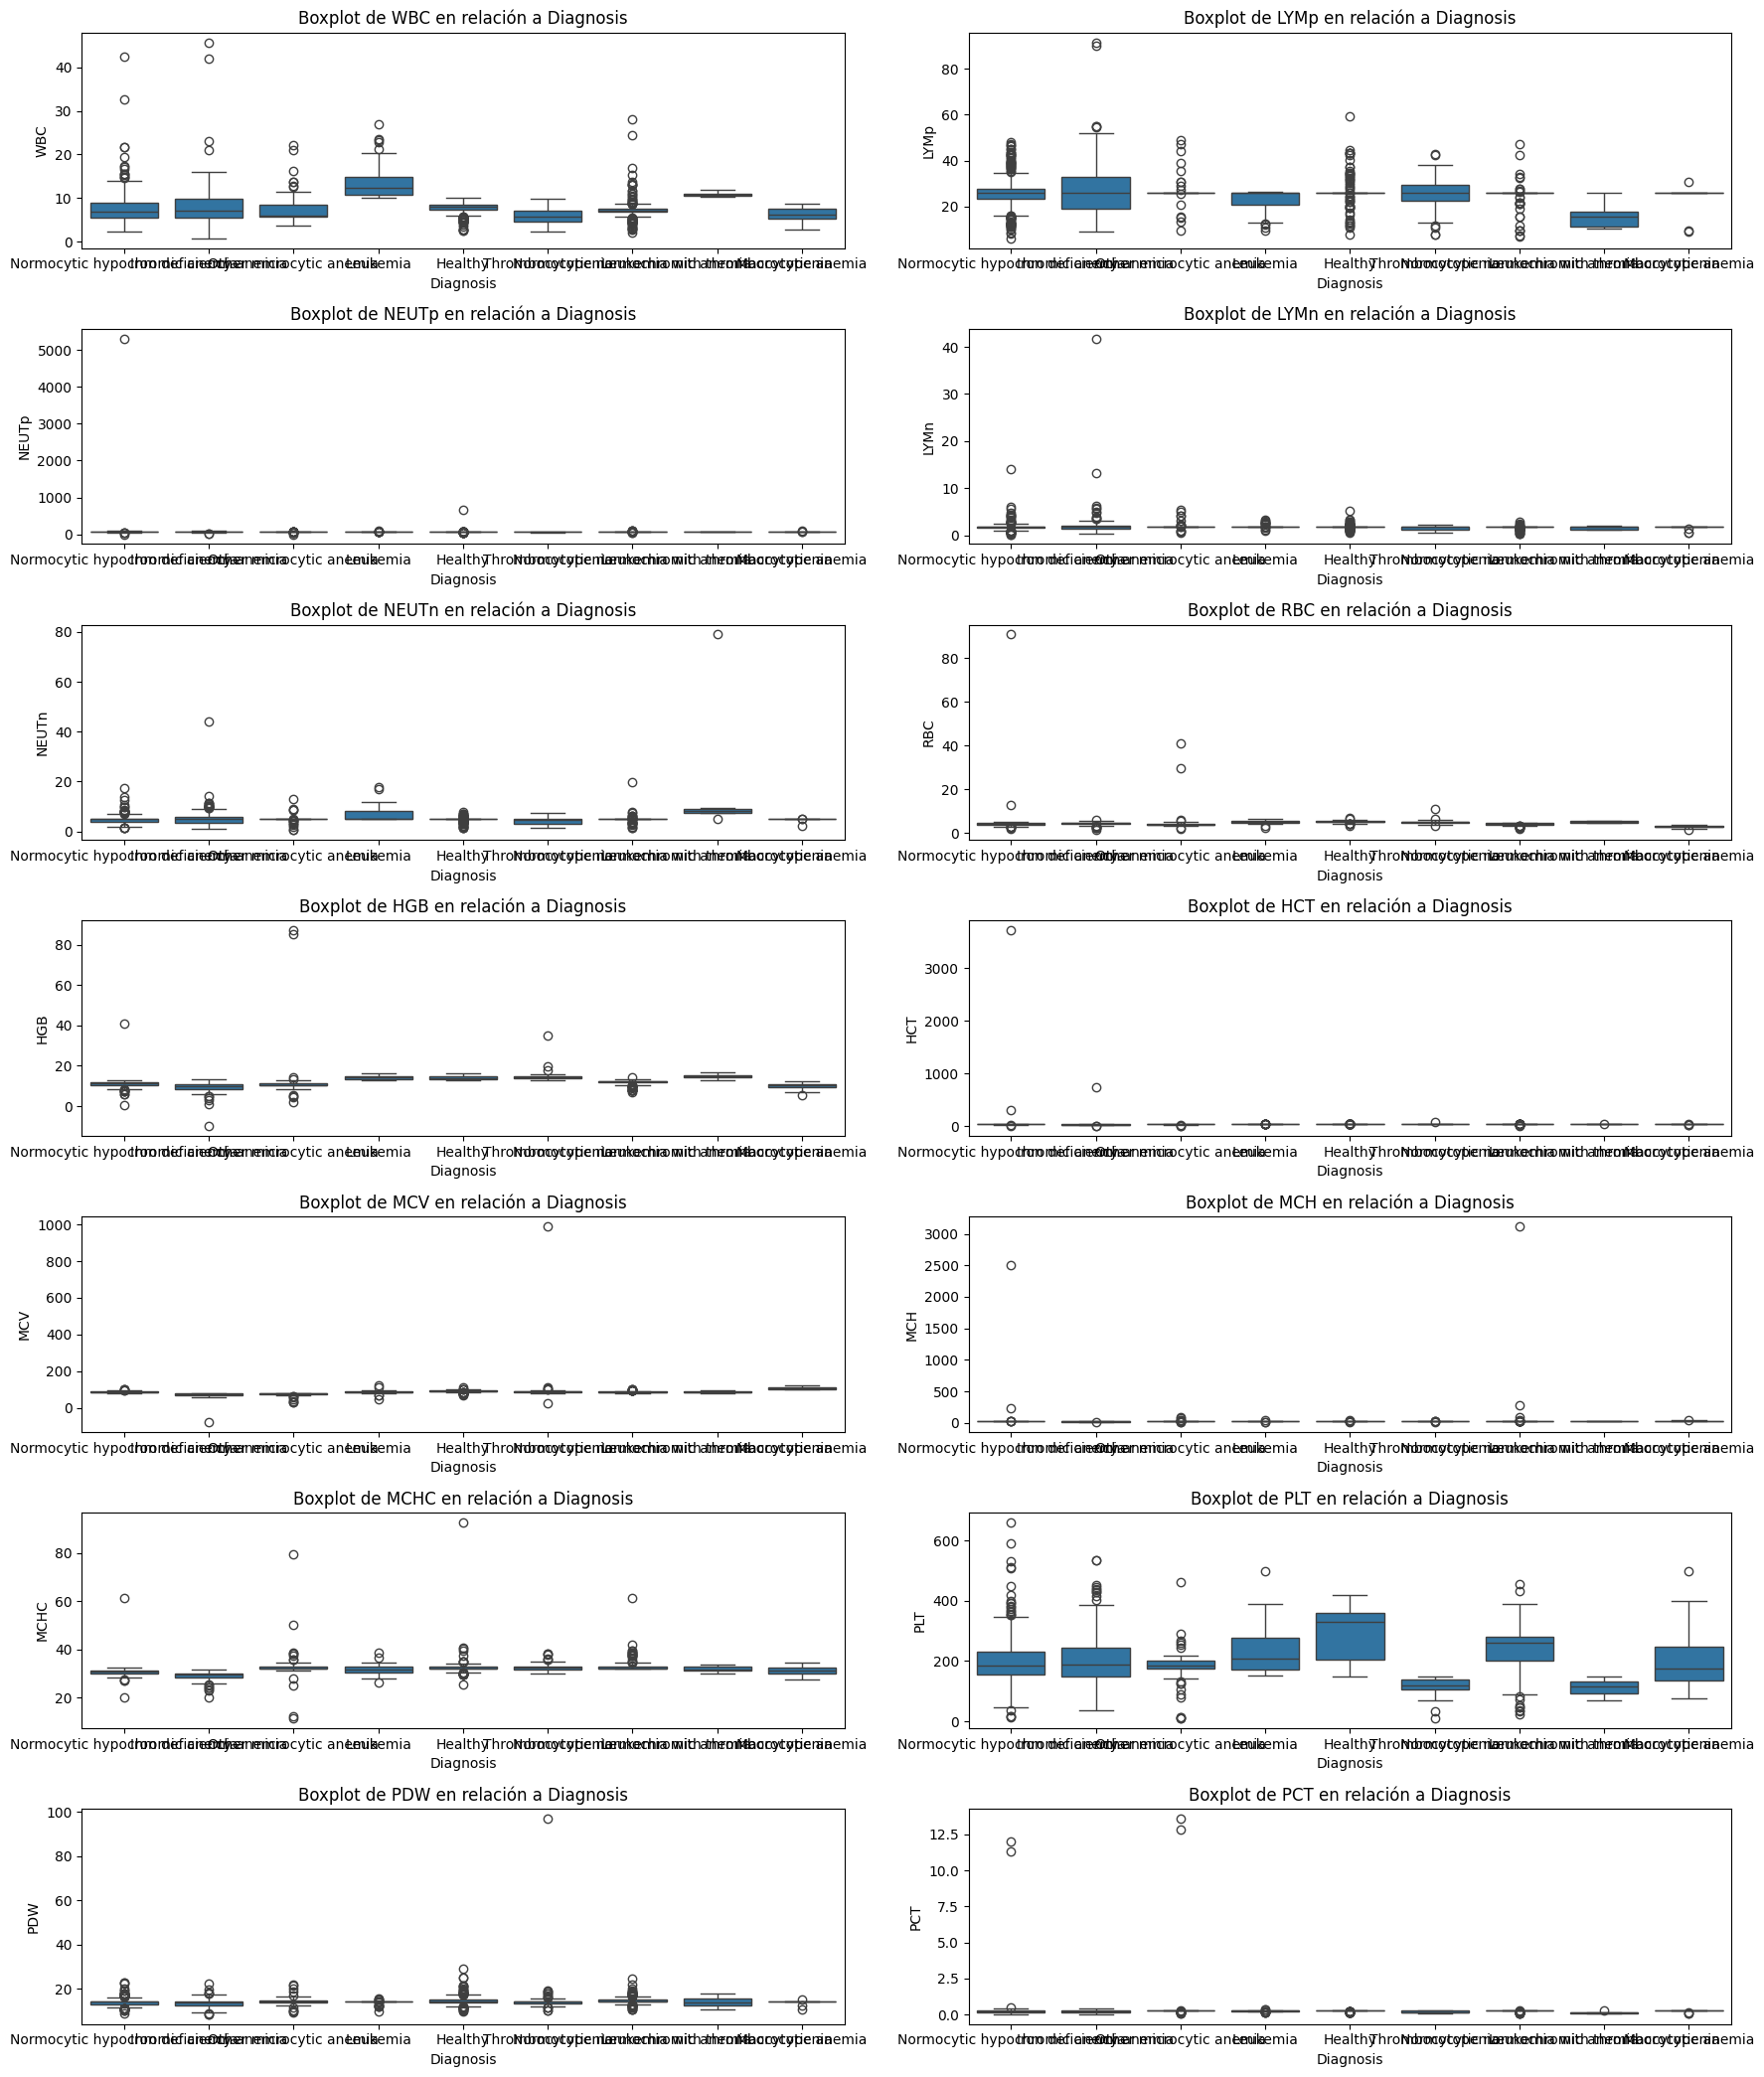

In [12]:
# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
categoria_column = 'Diagnosis'

# Determinar el número de filas y columnas para los subplots
num_plots = len(numeric_columns)
ncols = 2
nrows = (num_plots + 1) // ncols

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 3 * nrows))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot en cada subplot
for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x=categoria_column, y=column, data=data, ax=ax)
    ax.set_title(f'Boxplot de {column} en relación a {categoria_column}')

# Eliminar los ejes vacíos si hay más subplots que columnas numéricas
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()
plt.show()

In [13]:
def groupTable(df,group,reference):
    return df.groupby(group).agg({reference:['min',q01,'mean',q50,'max',q99,'std','count']})

groupTable(data,'Diagnosis','PDW')

PDW                                      \
                                 min     q01       mean        q50   max   
Diagnosis                                                                  
Healthy                          9.7  10.766  14.648068  14.312512  29.2   
Iron deficiency anemia           8.4   8.815  13.463181  13.600000  22.1   
Leukemia                         9.5  10.489  13.971883  14.312512  15.6   
Leukemia with thrombocytopenia  10.5  10.600  14.019319  13.800000  17.9   
Macrocytic anemia               10.7  10.970  14.010166  14.312512  14.9   
Normocytic hypochromic anemia    8.6  10.140  14.069746  14.312512  22.8   
Normocytic normochromic anemia  10.6  11.024  14.697592  14.312512  24.6   
Other microcytic anemia          9.3   9.575  14.440851  14.312512  21.8   
Thrombocytopenia                10.0  10.142  15.234205  14.312512  97.0   

                                                           
                                      q99       std count  
Diagnosis                                                  
Healthy                         21.278000  2.056731   323  
Iron deficiency anemia          18.421000  2.022330   184  
Leukemia                        15.385000  1.062330    44  
Leukemia with thrombocytopenia  17.850000  2.445068    11  
Macrocytic anemia               14.811877  1.007240    16  
Normocytic hypochromic anemia   20.750000  1.894932   271  
Normocytic normochromic anemia  19.522000  1.659574   255  
Other microcytic anemia         21.525000  2.325594    56  
Thrombocytopenia                41.620000  9.921059    72

Text(0.5, 0.98, 'BOXPLOT')

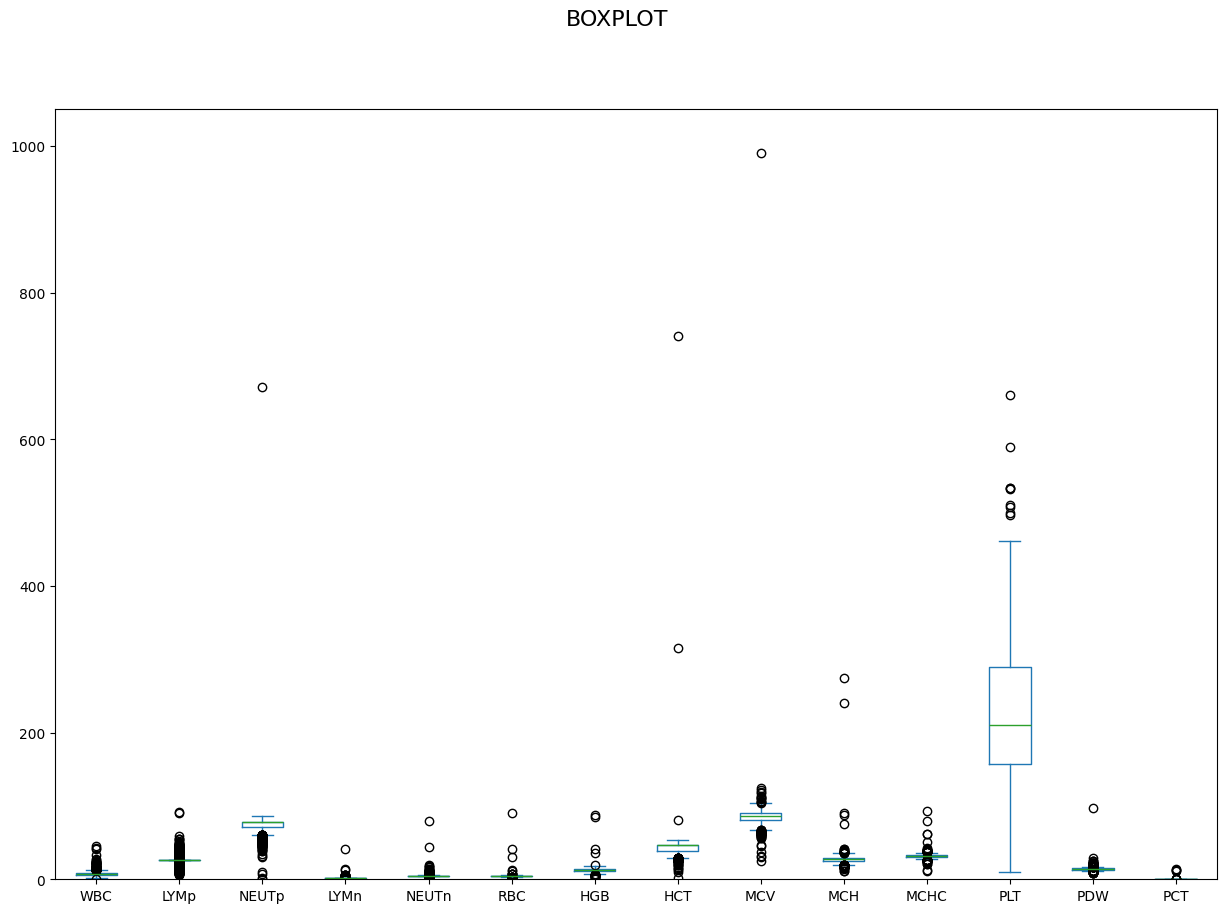

In [14]:
data.drop(['Diagnosis'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 1050)
plt.suptitle ('BOXPLOT', size=16)

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['Diagnosis_INT']  = label_encoder.fit_transform(data['Diagnosis'])
data = data.drop('Diagnosis', axis = 1)
data

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis_INT
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


In [16]:
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)

# # Extreme values ​​tend to have z-scores outside the range of 3 standard deviations
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_data = data[filtered_entries]
filtered_data # Dataset without outliers

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis_INT
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
6,16.70,19.100,68.200,3.20000,11.40000,5.15,14.2,44.8000,87.1,27.5,31.6,151.0,12.800000,0.14000,2
7,9.30,27.400,64.000,2.60000,5.90000,4.39,12.0,37.9000,86.4,27.3,31.6,194.0,15.900000,0.19000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


Text(0.5, 0.98, 'BOXPLOT')

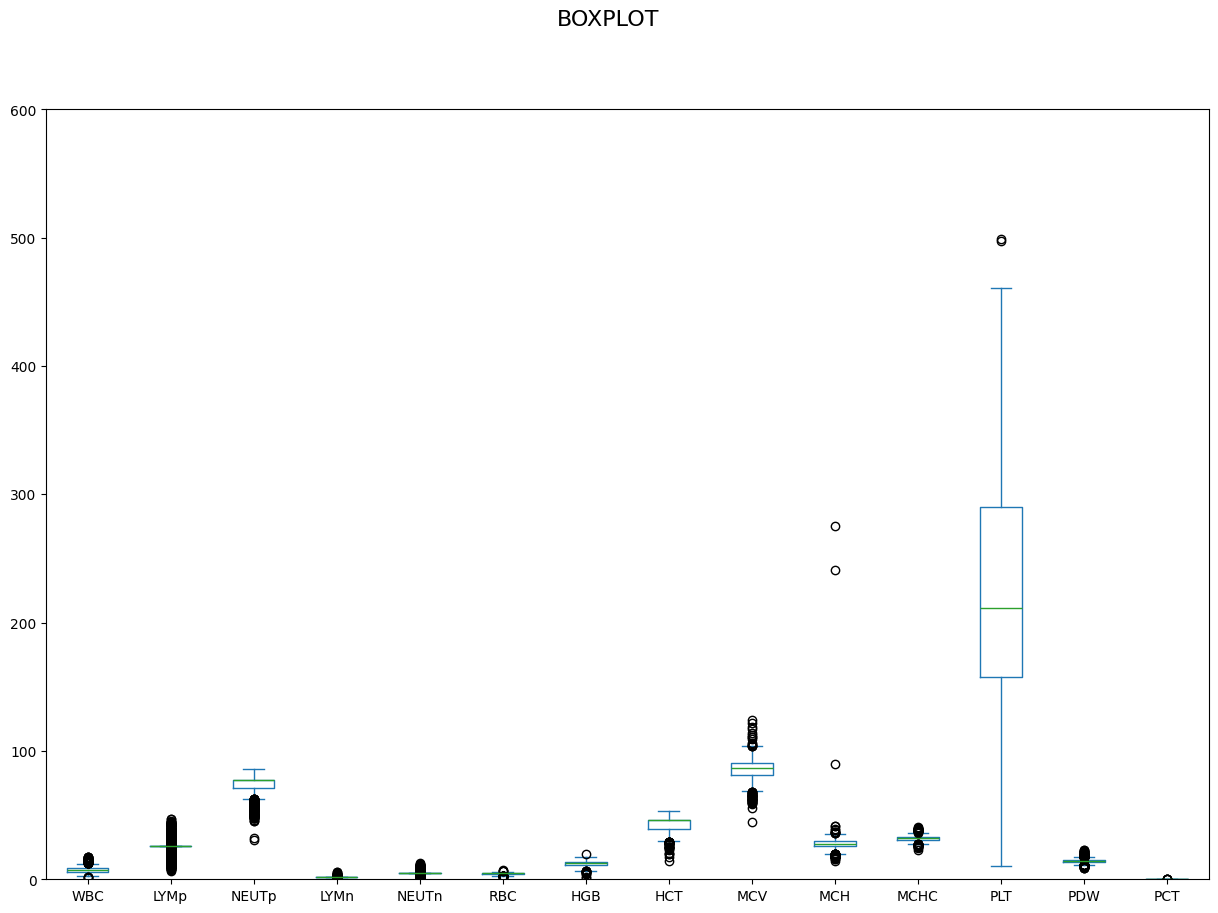

In [17]:
filtered_data.drop(['Diagnosis_INT'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 600)
plt.suptitle ('BOXPLOT', size=16)

Text(0.5, 0.98, 'BOXPLOT')

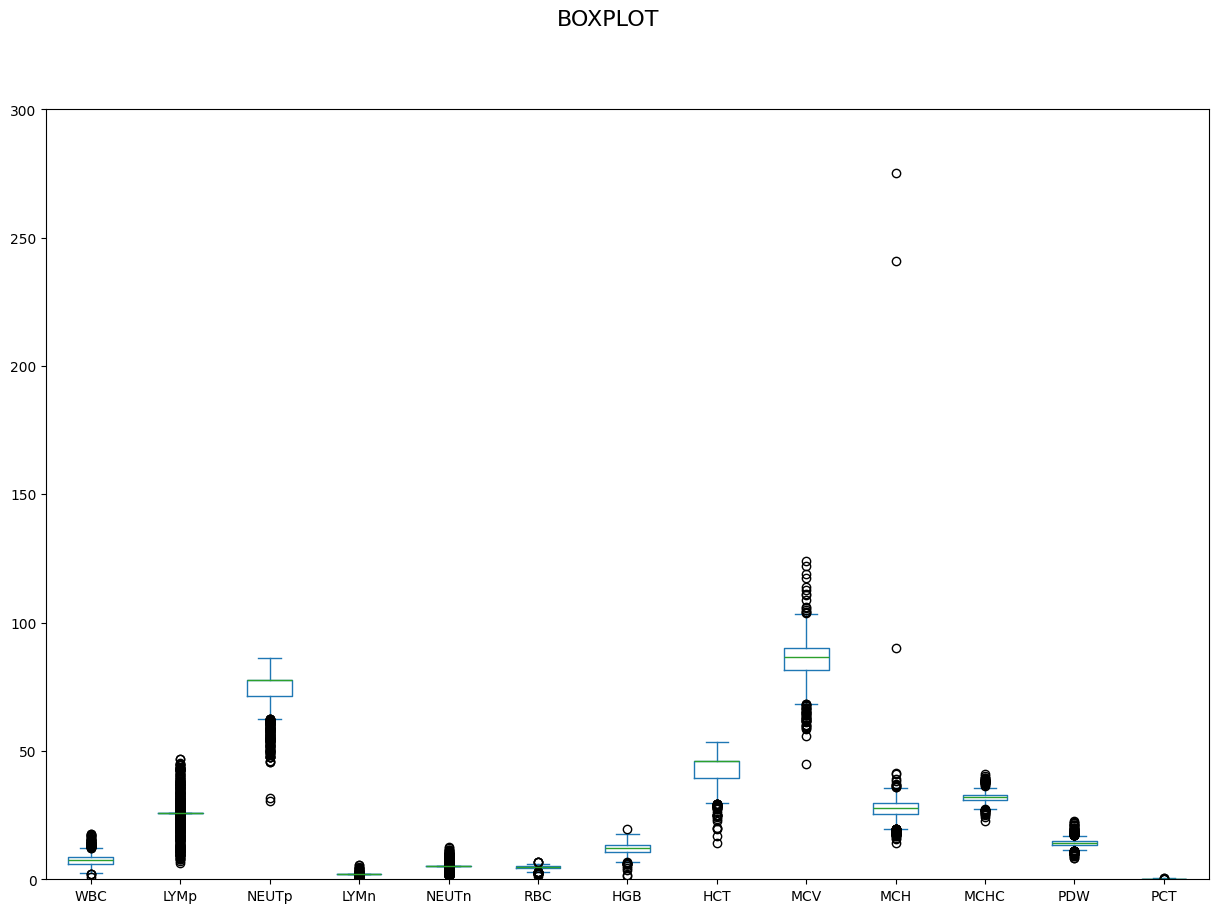

In [18]:
filtered_data.drop(['Diagnosis_INT','PLT'], axis = 1).plot(kind = 'box' ,figsize=(15,10), )
plt.ylim(0, 300)
plt.suptitle ('BOXPLOT', size=16)

In [19]:
features = filtered_data.select_dtypes(include = ['int', 'float']).columns.to_list()
features.remove('Diagnosis_INT')
features

['WBC',
 'LYMp',
 'NEUTp',
 'LYMn',
 'NEUTn',
 'RBC',
 'HGB',
 'HCT',
 'MCV',
 'MCH',
 'MCHC',
 'PLT',
 'PDW',
 'PCT']

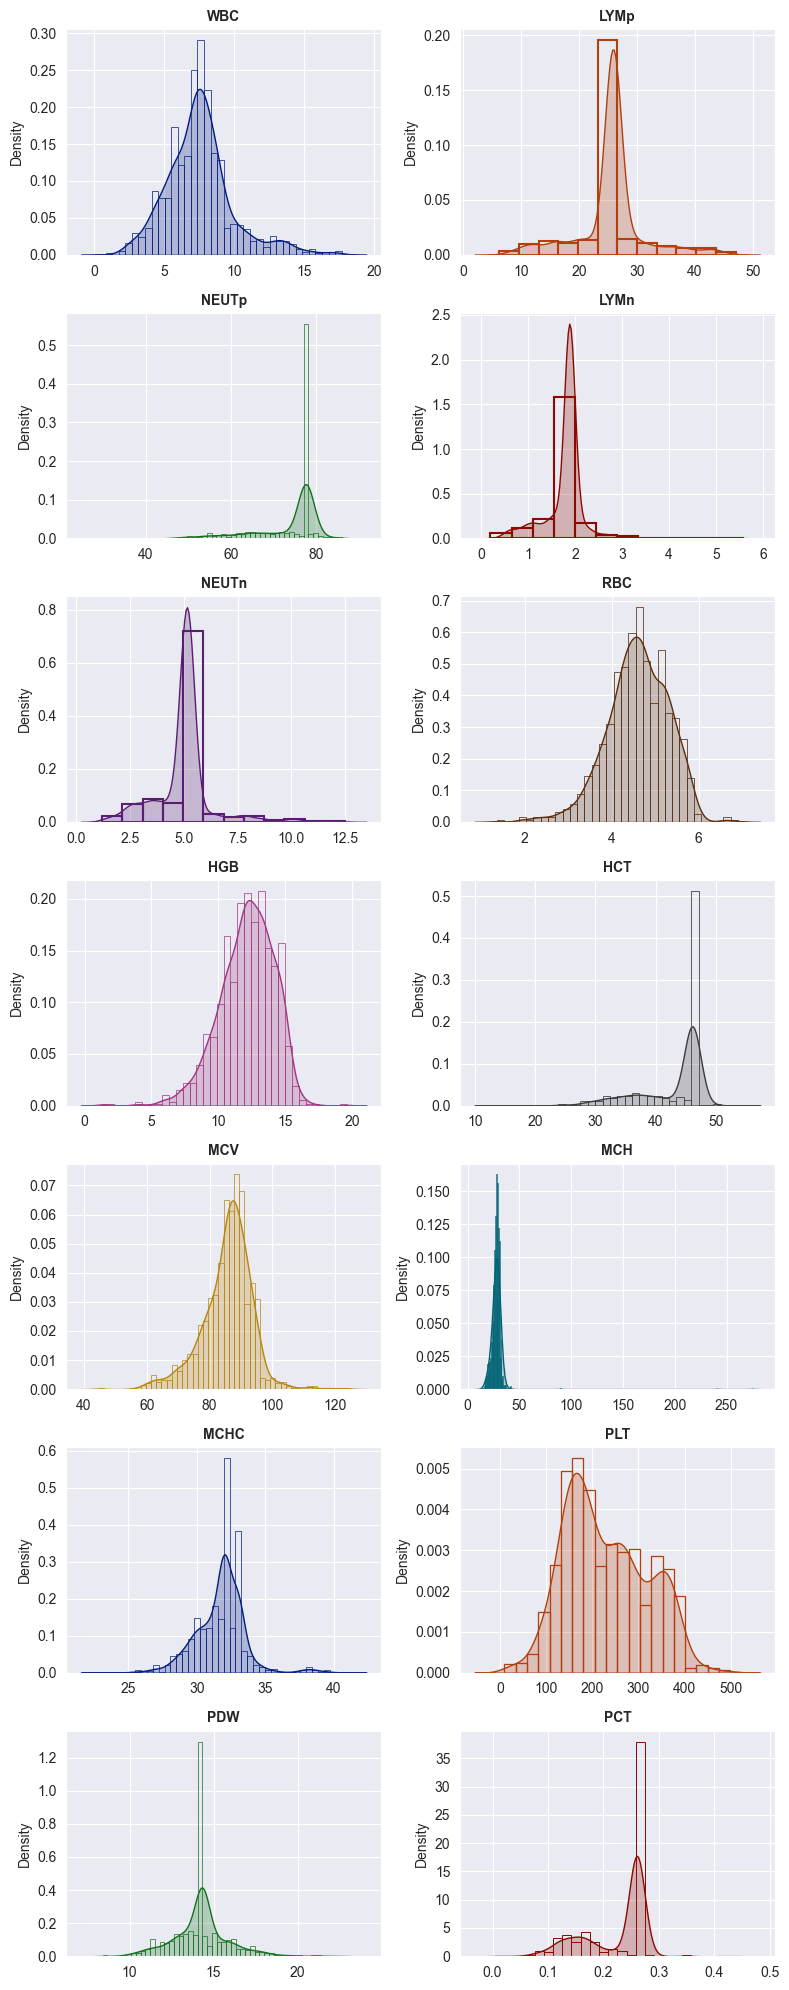

In [20]:
def histoGraf(data,features):
    sns.set_style("darkgrid")
    colors = sns.color_palette(palette = 'dark', n_colors = len(features))
    fig,axs = plt.subplots(nrows = 7, ncols = 2, figsize = (8, 20))
    axs = axs.flat

    for i,feature in enumerate(features):
        sns.histplot(data, x = feature, stat = 'density', fill = False, color = colors[i], ax = axs[i])
        sns.kdeplot(data, x = feature, fill = True, color = colors[i], ax = axs[i])
        axs[i].set_xlabel("")
        axs[i].set_title(f"{feature}", fontsize = 10, fontweight = 'bold')

    fig.tight_layout()
    fig.show()

histoGraf(filtered_data,features)


Text(0.5, 1.0, 'Matriz de Correlacion')

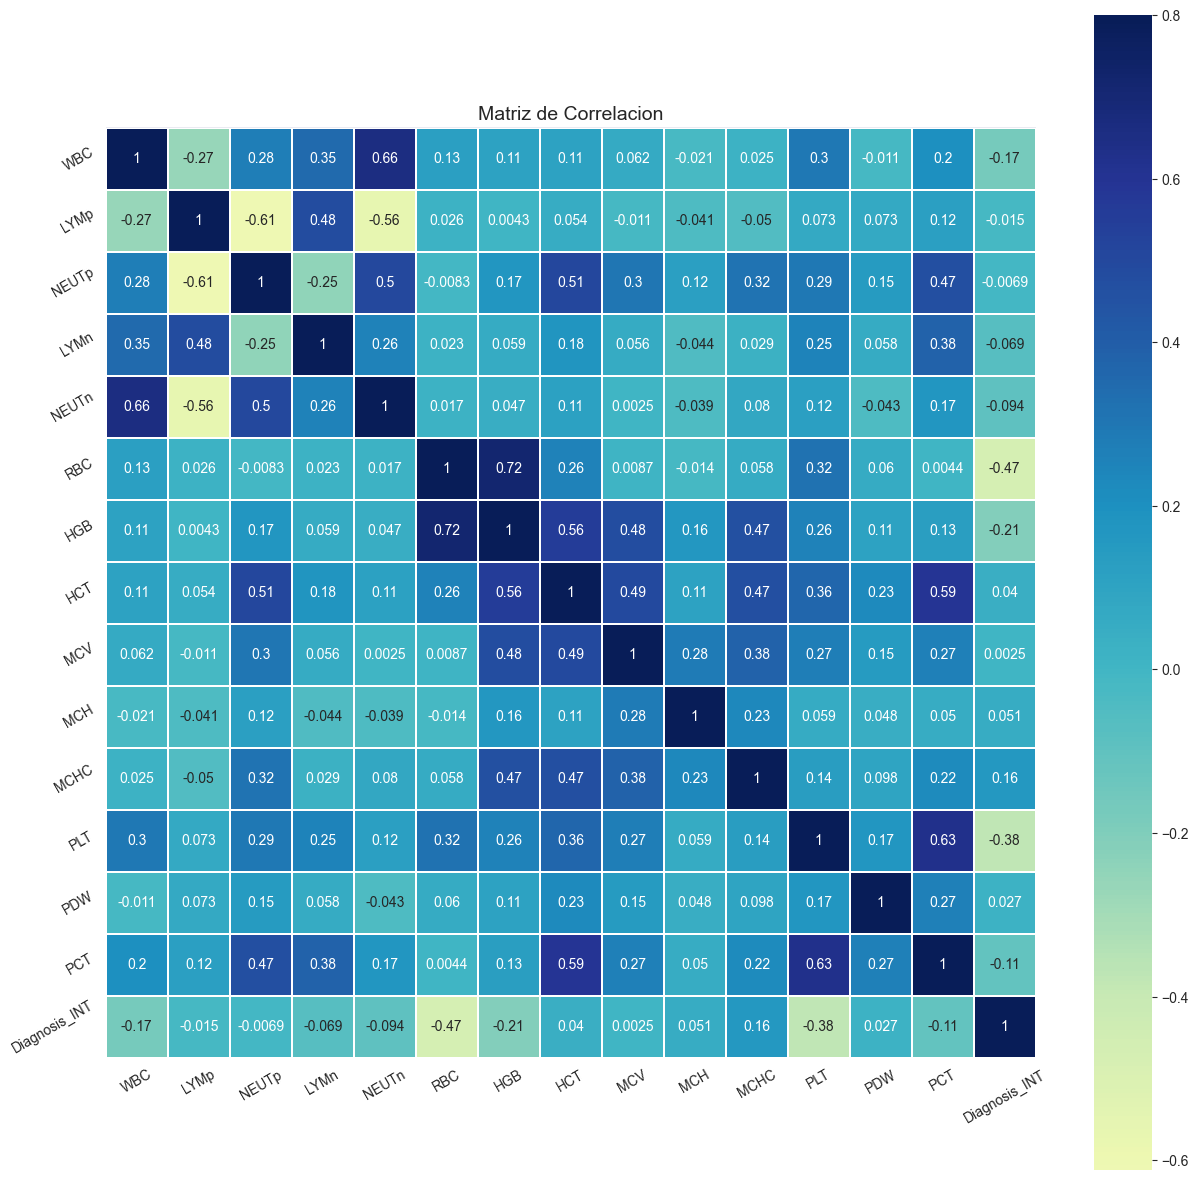

In [21]:
corr= filtered_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.1,
            square=True, annot=True, cmap='YlGnBu',
            center=0, linecolor="white")
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Matriz de Correlacion', size=14)

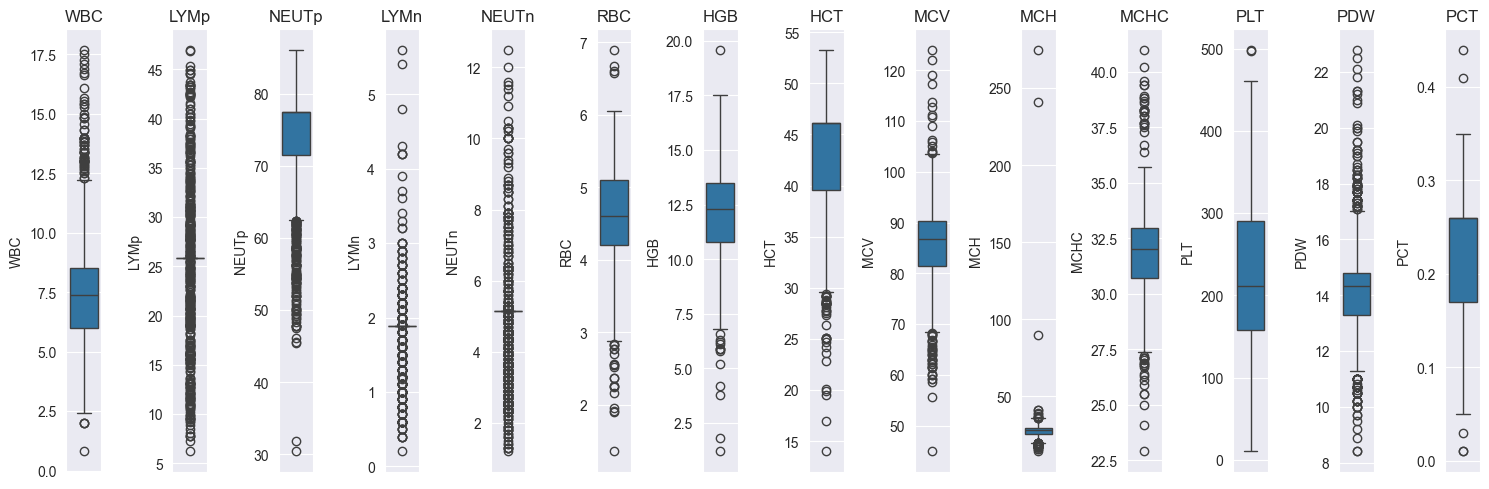

In [22]:
def boxplotperField(data):
    fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 5))

    for i, col in enumerate(data.columns):
        sns.boxplot(y=data[col], ax=axes[i])
        axes[i].set_title(f'{col}')

    # Ajustar espaciado entre subplots
    plt.tight_layout()

    # Mostrar la figura
    plt.show()

boxplotperField(filtered_data.drop(['Diagnosis_INT'], axis = 1))

In [23]:
filtered_data['log_WBC']=np.log(filtered_data['WBC'])
filtered_data['log_LYMp']=np.log(filtered_data['LYMp'])
filtered_data['log_NEUTp']=np.log(filtered_data['NEUTp'])
filtered_data['log_LYMn']=np.log(filtered_data['LYMn'])
filtered_data['log_NEUTn']=np.log(filtered_data['NEUTn'])
filtered_data['log_RBC']=np.log(filtered_data['RBC'])
filtered_data['log_HGB']=np.log(filtered_data['HGB'])
filtered_data['log_HCT']=np.log(filtered_data['HCT'])
filtered_data['log_MCV']=np.log(filtered_data['MCV'])
filtered_data['log_MCH']=np.log(filtered_data['MCH'])
filtered_data['log_MCHC']=np.log(filtered_data['MCHC'])
filtered_data['log_PLT']=np.log(filtered_data['PLT'])
filtered_data['log_PDW']=np.log(filtered_data['PDW'])
filtered_data['log_PCT']=np.log(filtered_data['PCT'])

In [24]:
list_var = data.select_dtypes(include = ['int', 'float']).columns.to_list()
list_var

['WBC',
 'LYMp',
 'NEUTp',
 'LYMn',
 'NEUTn',
 'RBC',
 'HGB',
 'HCT',
 'MCV',
 'MCH',
 'MCHC',
 'PLT',
 'PDW',
 'PCT',
 'Diagnosis_INT']

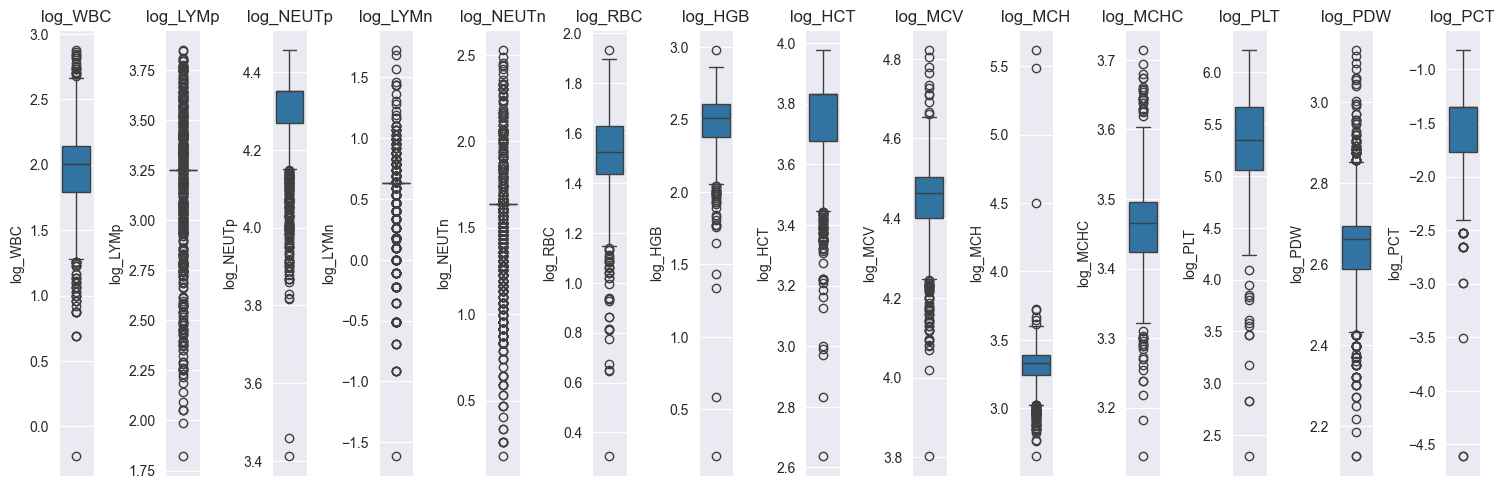

In [25]:
boxplotperField(filtered_data.drop(list_var,axis=1))
#filtered_data.agg({'WBC':['min',q01,'max',q99]}).T

Text(0.5, 1.0, 'Matriz de Correlacion')

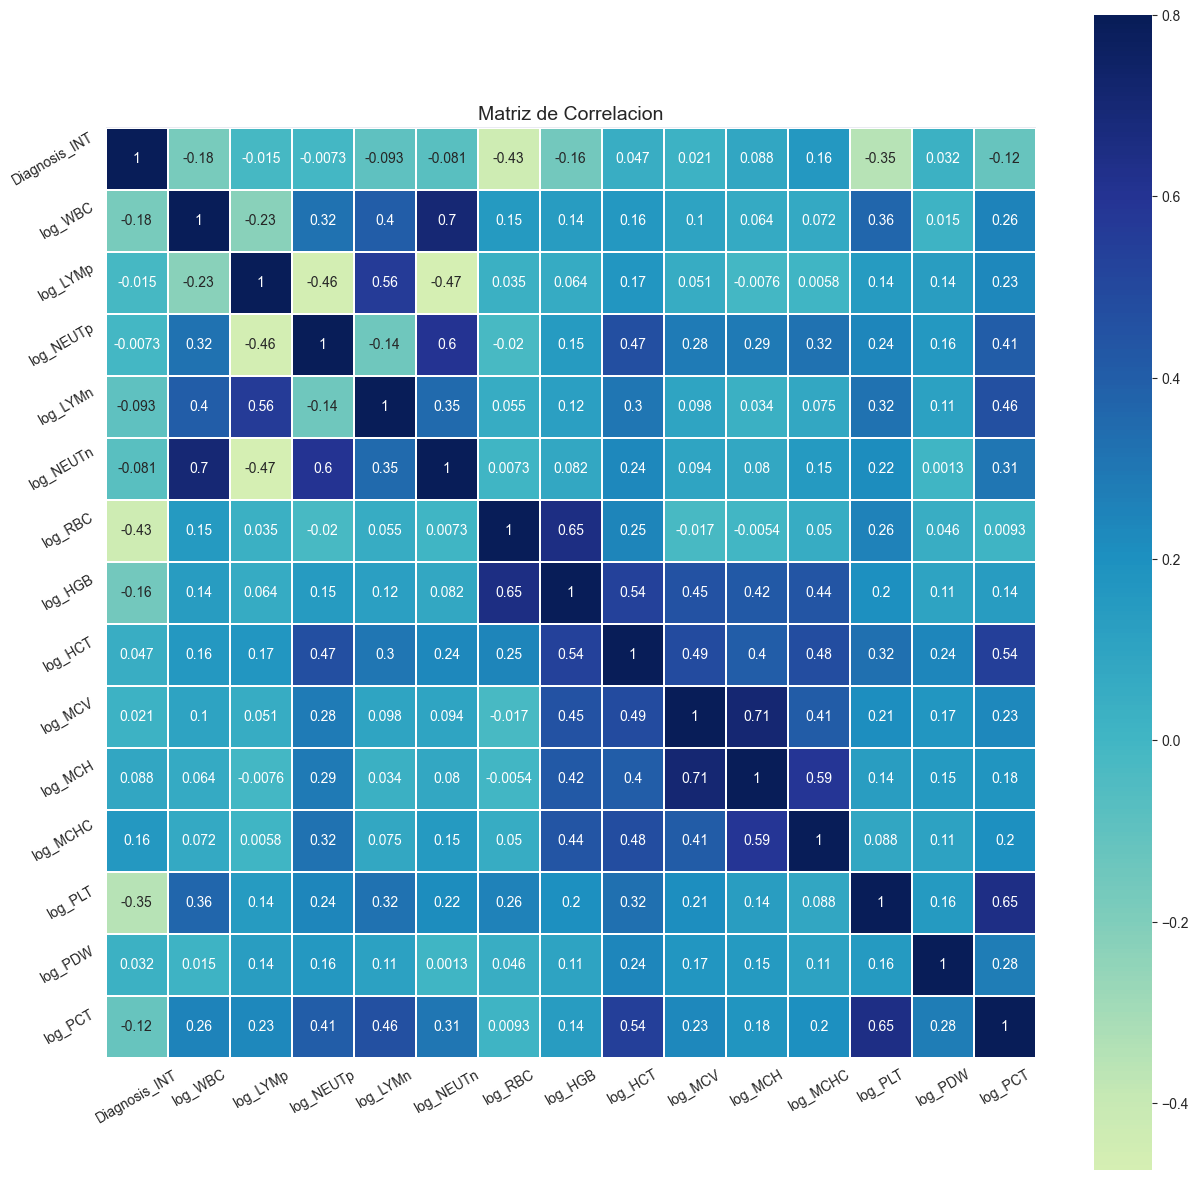

In [26]:
list_var.remove('Diagnosis_INT')
filtered_data_log = filtered_data.drop(list_var,axis=1)
corr= filtered_data_log.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.1,
            square=True, annot=True, cmap='YlGnBu',
            center=0, linecolor="white")
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Matriz de Correlacion', size=14)

In [27]:
var_finales = ['log_PCT','log_PLT','log_MCHC','log_HGB','log_RBC','log_WBC'] #MAYOR CORRELACION

In [28]:
var_finales.append('Diagnosis_INT')
df_final = filtered_data_log[var_finales].copy()

In [29]:
df_final.head()

,log_PCT,log_PLT,log_MCHC,log_HGB,log_RBC,log_WBC,Diagnosis_INT
0,-1.771957,5.241747,3.404525,1.987874,1.018847,2.302585,5
2,-1.966113,4.997212,3.384390,2.197225,1.378766,1.974081,1
3,-2.120264,4.962845,3.394508,1.335001,1.439835,1.791759,1
6,-1.966113,5.017280,3.453157,2.653242,1.638997,2.815409,2
7,-1.660731,5.267858,3.453157,2.484907,1.479329,2.230014,5


# 3. MODELAMIENTO

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
x= df_final.drop(['Diagnosis_INT'], axis=1)
y= df_final['Diagnosis_INT']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score

decision_tree_1 = DecisionTreeClassifier()
knn_1 = KNeighborsClassifier()

models_1 = [decision_tree_1, knn_1]
accuracy_scores_1 = []
y_pred_1 = []

for model in models_1:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_1.append(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_1.append(accuracy)
    print(f"{model.__class__.__name__}: {accuracy}")

DecisionTreeClassifier: 0.9094827586206896
KNeighborsClassifier: 0.7155172413793104


In [38]:
y_pred_1

[array([2, 5, 1, 5, 0, 5, 0, 0, 5, 6, 5, 5, 5, 5, 1, 0, 0, 0, 6, 5, 5, 5,
        1, 0, 7, 0, 1, 6, 1, 2, 7, 0, 5, 8, 6, 1, 6, 6, 6, 5, 0, 5, 5, 0,
        1, 0, 5, 0, 1, 8, 6, 6, 0, 6, 1, 6, 1, 6, 1, 1, 5, 7, 7, 5, 5, 6,
        7, 0, 6, 0, 0, 0, 6, 1, 1, 0, 0, 6, 0, 6, 1, 8, 8, 8, 6, 6, 6, 5,
        0, 1, 8, 8, 5, 1, 6, 8, 6, 1, 1, 1, 6, 5, 7, 6, 0, 8, 7, 5, 3, 6,
        6, 6, 2, 8, 5, 0, 6, 5, 0, 5, 0, 0, 6, 5, 5, 6, 0, 6, 1, 7, 6, 1,
        5, 1, 6, 5, 0, 6, 2, 1, 6, 0, 5, 0, 6, 0, 6, 0, 0, 0, 5, 6, 5, 3,
        1, 6, 8, 5, 6, 5, 5, 6, 0, 0, 1, 6, 0, 1, 0, 5, 6, 0, 1, 0, 5, 2,
        0, 8, 5, 0, 2, 6, 6, 0, 1, 0, 1, 8, 2, 1, 5, 6, 0, 5, 0, 7, 1, 4,
        0, 6, 6, 4, 5, 1, 0, 5, 0, 0, 6, 1, 6, 5, 5, 0, 0, 6, 5, 0, 5, 7,
        2, 5, 0, 6, 0, 6, 0, 8, 7, 8, 1, 5]),
 array([0, 6, 5, 5, 0, 5, 0, 0, 5, 6, 5, 0, 5, 6, 1, 0, 0, 6, 7, 5, 5, 0,
        1, 0, 7, 0, 1, 6, 5, 2, 7, 0, 5, 8, 6, 5, 6, 5, 6, 1, 0, 0, 5, 0,
        1, 0, 5, 0, 5, 8, 8, 6, 0, 8, 1, 6, 5, 6, 1, 1, 6, 7, 8, 5

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score

In [35]:
all_accuracy_scores = []
models_names = []
all_models = []
all_f1_scores = []
all_precision_scores = []
all_recall_scores = []
all_cross_val_scores = []

for i, model in enumerate(models_1):
    models_names.append(f"{model.__class__.__name__} 1")
    all_models.append(model)
    all_accuracy_scores.append(accuracy_scores_1[i])
    all_f1_scores.append(f1_score(y_test, y_pred_1[i], average='weighted'))
    all_recall_scores.append(recall_score(y_test, y_pred_1[i], average='weighted'))
    all_precision_scores.append(precision_score(y_test, y_pred_1[i], average='weighted'))

    for model in all_models:
        score = cross_val_score(model, x, y, cv=10)
        all_cross_val_scores.append(score.mean())

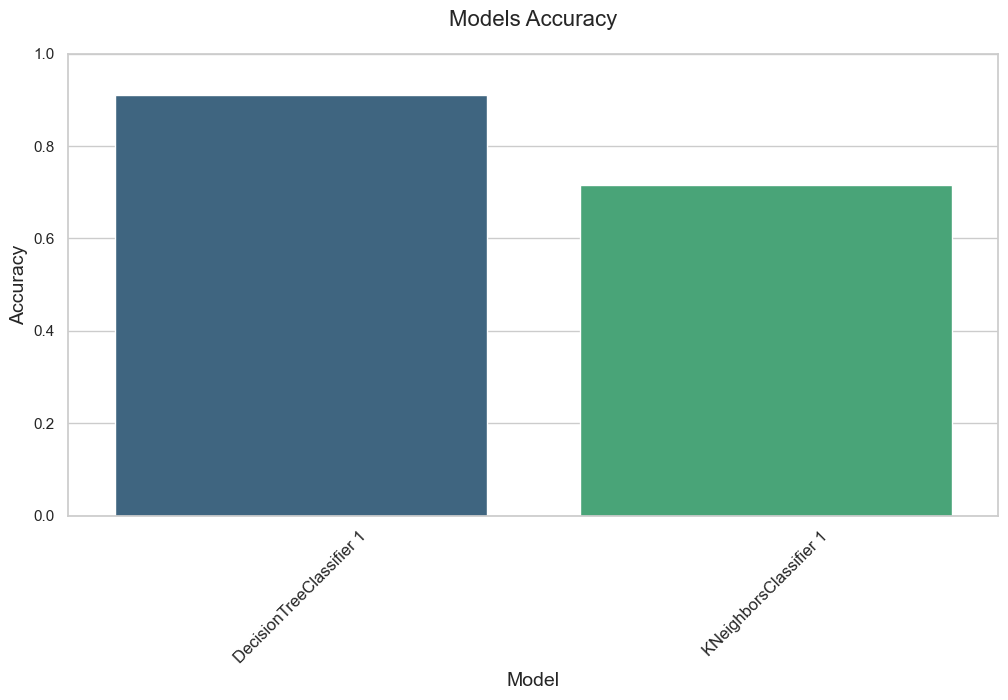

In [36]:
sns.set(style="whitegrid")
sns.set_palette("viridis")

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=models_names, y=all_accuracy_scores, ax=ax, palette="viridis", saturation=0.7, ci=None, errwidth=0.5)

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Models Accuracy', fontsize=16, pad=20)

plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1)
plt.show()

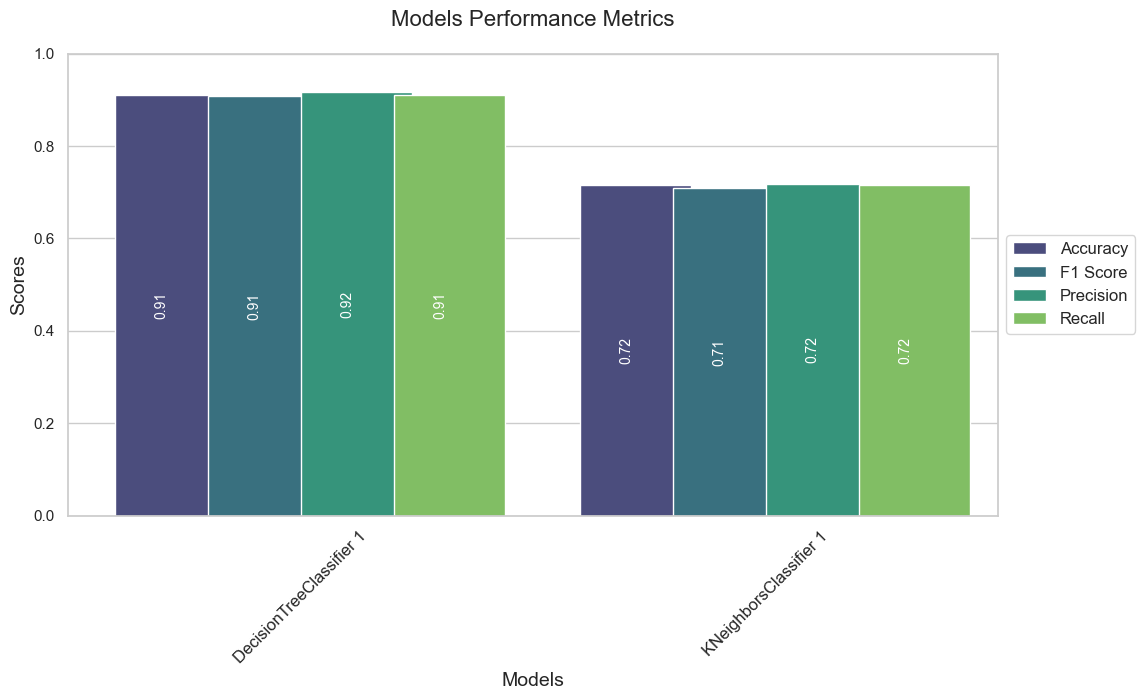

In [37]:
data = {
    'Model': models_names,
    'Accuracy': all_accuracy_scores,
    #'Cross-Validation': all_cross_val_scores,
    'F1 Score': all_f1_scores,
    'Precision': all_precision_scores,
    'Recall': all_recall_scores
}

stats = pd.DataFrame(data)

df_long = pd.melt(stats, id_vars=['Model'], var_name='Metric', value_name='Score')

sns.set(style="whitegrid")
sns.set_palette("viridis")

fig, ax = plt.subplots(figsize=(12, 6))

bar_plot = sns.barplot(x='Model', y='Score', hue='Metric', data=df_long, ax=ax, palette="viridis", saturation=0.7, ci=None)

ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Models Performance Metrics', fontsize=16, pad=20)

plt.xticks(rotation=45, fontsize=12)

plt.ylim(0, 1)

for p in bar_plot.patches:
    try:
        height = p.get_height()
        ax.annotate(f'{height:.2}',
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=10, color='white', rotation=90)
    except ValueError:
        pass

for patch in bar_plot.patches:
    current_width = patch.get_width()
    patch.set_width(current_width * 1.2)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()